In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Problem 1 : Predicting CentralAir using SalePrice

In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.

In [12]:
house_price = pd.read_csv('train.csv')
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
central_air = house_price['CentralAir'].to_frame()
sale_price = house_price['SalePrice'].to_frame()

In [14]:
central_air.head()

,CentralAir
0,Y
1,Y
2,Y
3,Y
4,Y


In [15]:
sale_price.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


## (a)

Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

Split the data into train and test sets in an 80:20 ratio.

In [16]:
from sklearn.model_selection import train_test_split

central_air_train, central_air_test, sale_price_train, sale_price_test = train_test_split(central_air, sale_price, test_size=0.2)

print(len(central_air_train), len(central_air_test), len(sale_price_train), len(sale_price_test))

1168 292 1168 292


Fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict `CentraAir` using `SalePrice`.

In [20]:
from sklearn.tree import DecisionTreeClassifier

price_air_tree_2 = DecisionTreeClassifier(max_depth=2)
price_air_tree_4 = DecisionTreeClassifier(max_depth=4)
price_air_tree_2.fit(sale_price_train, central_air_train)
price_air_tree_4.fit(sale_price_train, central_air_train)

DecisionTreeClassifier(max_depth=4)

Plot the trees.

[Text(0.48, 0.9, 'SalePrice <= 107700.0\ngini = 0.122\nsamples = 1168\nvalue = [76, 1092]\nclass = Y'),
 Text(0.22, 0.7, 'SalePrice <= 62750.0\ngini = 0.474\nsamples = 122\nvalue = [47, 75]\nclass = Y'),
 Text(0.08, 0.5, 'SalePrice <= 46000.0\ngini = 0.245\nsamples = 14\nvalue = [12, 2]\nclass = N'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = N'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.16, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = N'),
 Text(0.36, 0.5, 'SalePrice <= 105950.0\ngini = 0.438\nsamples = 108\nvalue = [35, 73]\nclass = Y'),
 Text(0.28, 0.3, 'SalePrice <= 98300.0\ngini = 0.414\nsamples = 99\nvalue = [29, 70]\nclass = Y'),
 Text(0.24, 0.1, 'gini = 0.466\nsamples = 73\nvalue = [27, 46]\nclass = Y'),
 Text(0.32, 0.1, 'gini = 0.142\nsamples = 26\nvalue = [2, 24]\nclass = Y'),
 Text(0.44, 0.3, 'SalePrice <= 

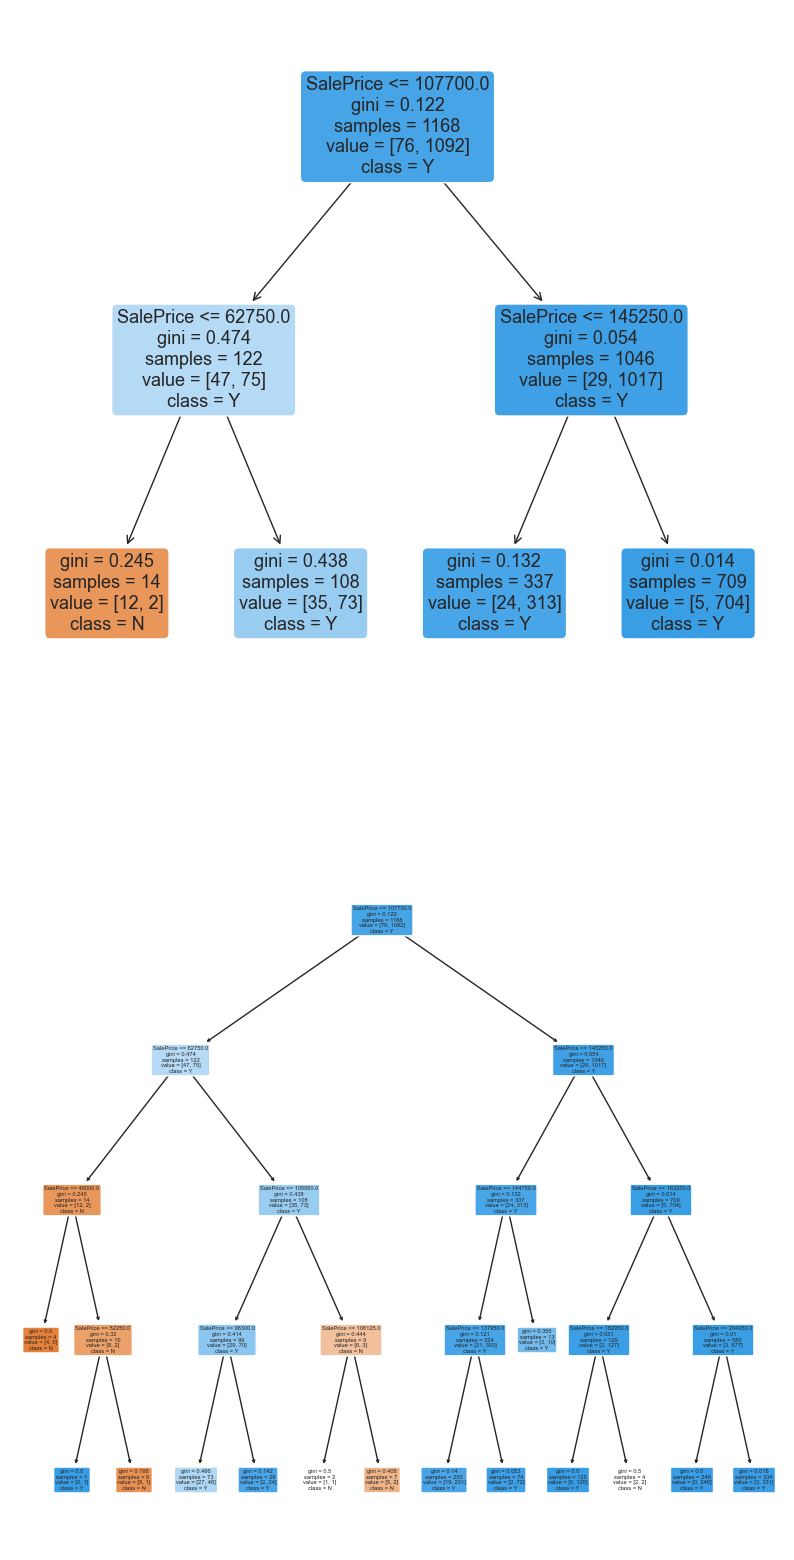

In [26]:
from sklearn.tree import plot_tree

f, ax = plt.subplots(2, 1, figsize=(10, 20))
plot_tree(price_air_tree_2, ax=ax[0], filled=True, rounded=True, feature_names=['SalePrice'], class_names=['N', 'Y'])
plot_tree(price_air_tree_4, ax=ax[1], filled=True, rounded=True, feature_names=['SalePrice'], class_names=['N', 'Y'])

## (b)

Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

Classification Accuracy:
Train set, max_depth=2:  0.9409246575342466
Test set, max_depth=2:  0.9452054794520548
Train set, max_depth=4:  0.9417808219178082
Test set, max_depth=4:  0.9417808219178082

True Positive Rate:
Train set, max_depth=2:  0.9972477064220183
Test set, max_depth=2:  1.0
Train set, max_depth=4:  0.9917431192660551
Test set, max_depth=4:  0.9927272727272727

False Positive Rate:
Train set, max_depth=2:  0.8461538461538461
Test set, max_depth=2:  0.9411764705882353
Train set, max_depth=4:  0.7564102564102564
Test set, max_depth=4:  0.8823529411764706


Text(0.5, 1.0, 'Test set, max_depth=4')

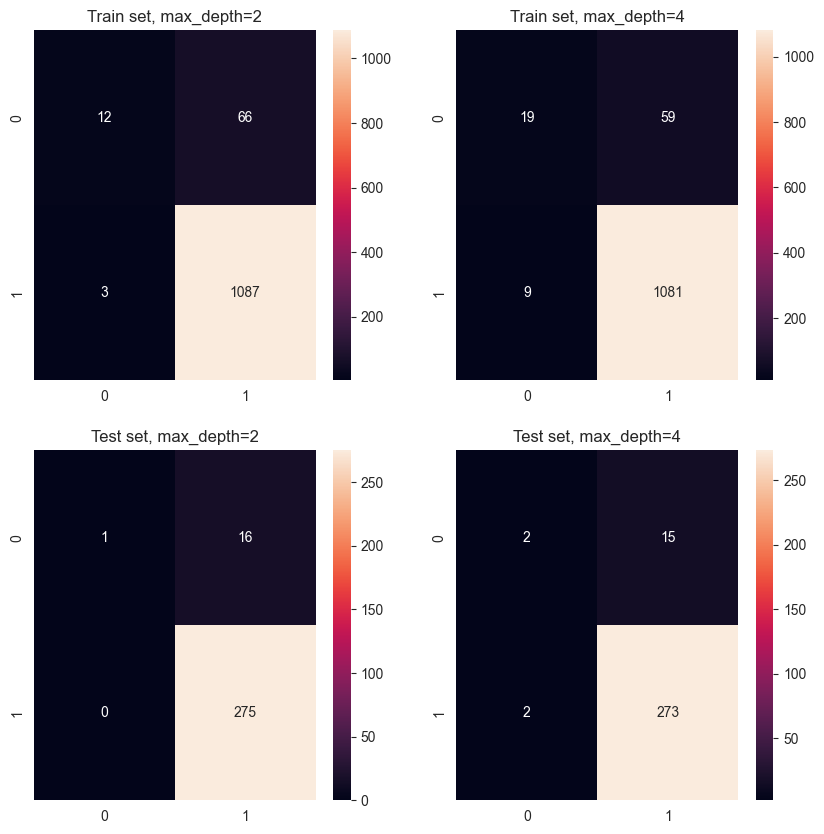

In [71]:
from sklearn.metrics import confusion_matrix

# Predictions
price_air_predict_train_2 = price_air_tree_2.predict(sale_price_train)
price_air_predict_test_2 = price_air_tree_2.predict(sale_price_test)
price_air_predict_train_4 = price_air_tree_4.predict(sale_price_train)
price_air_predict_test_4 = price_air_tree_4.predict(sale_price_test)

# Classification Accuracy
print("Classification Accuracy:")
print("Train set, max_depth=2: ", price_air_tree_2.score(sale_price_train, central_air_train))
print("Test set, max_depth=2: ", price_air_tree_2.score(sale_price_test, central_air_test))
print("Train set, max_depth=4: ", price_air_tree_4.score(sale_price_train, central_air_train))
print("Test set, max_depth=4: ", price_air_tree_4.score(sale_price_test, central_air_test))

print()

# Calculate confusion matrix
confusion_matrix_train_2 = confusion_matrix(central_air_train, price_air_predict_train_2)
confusion_matrix_test_2 = confusion_matrix(central_air_test, price_air_predict_test_2)
confusion_matrix_train_4 = confusion_matrix(central_air_train, price_air_predict_train_4)
confusion_matrix_test_4 = confusion_matrix(central_air_test, price_air_predict_test_4)

# Calculate True Positive Rate
print("True Positive Rate:")
print("Train set, max_depth=2: ", confusion_matrix_train_2[1, 1] / (confusion_matrix_train_2[1, 1] + confusion_matrix_train_2[1, 0]))
print("Test set, max_depth=2: ", confusion_matrix_test_2[1, 1] / (confusion_matrix_test_2[1, 1] + confusion_matrix_test_2[1, 0]))
print("Train set, max_depth=4: ", confusion_matrix_train_4[1, 1] / (confusion_matrix_train_4[1, 1] + confusion_matrix_train_4[1, 0]))
print("Test set, max_depth=4: ", confusion_matrix_test_4[1, 1] / (confusion_matrix_test_4[1, 1] + confusion_matrix_test_4[1, 0]))

print()

# Calculate False Positive Rate
print("False Positive Rate:")
print("Train set, max_depth=2: ", confusion_matrix_train_2[0, 1] / (confusion_matrix_train_2[0, 1] + confusion_matrix_train_2[0, 0]))
print("Test set, max_depth=2: ", confusion_matrix_test_2[0, 1] / (confusion_matrix_test_2[0, 1] + confusion_matrix_test_2[0, 0]))
print("Train set, max_depth=4: ", confusion_matrix_train_4[0, 1] / (confusion_matrix_train_4[0, 1] + confusion_matrix_train_4[0, 0]))
print("Test set, max_depth=4: ", confusion_matrix_test_4[0, 1] / (confusion_matrix_test_4[0, 1] + confusion_matrix_test_4[0, 0]))

f, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(confusion_matrix_train_2, annot=True, fmt='d', ax=ax[0, 0])
sns.heatmap(confusion_matrix_train_4, annot=True, fmt='d', ax=ax[0, 1])
sns.heatmap(confusion_matrix_test_2, annot=True, fmt='d', ax=ax[1, 0])
sns.heatmap(confusion_matrix_test_4, annot=True, fmt='d', ax=ax[1, 1])

ax[0, 0].set_title('Train set, max_depth=2')
ax[0, 1].set_title('Train set, max_depth=4')
ax[1, 0].set_title('Test set, max_depth=2')
ax[1, 1].set_title('Test set, max_depth=4')

We found that the model with max_depth=4 is better because it has a higher classification accuracy and a lower false positive rate on the test set.

# Problem 2 : Predicting CentralAir using Other Variables

Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to predict CentralAir using the variables `OverallQual` and `YearBuilt`. Justify which of the variables is the best predictor.

Create a function to predict the value of y given x and evaluate the model.

In [52]:
def predict(x: pd.DataFrame, y: pd.DataFrame) -> DecisionTreeClassifier:
    """
    Predicts the value of y given x and evaluates the model.
    """
    # Split the data into training and test sets in an 80:20 ratio
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Fit the model
    tree = DecisionTreeClassifier(max_depth=4)
    tree.fit(x_train, y_train)

    # Predict the values
    y_predict_train = tree.predict(x_train)
    y_predict_test = tree.predict(x_test)

    # Calculate the confusion matrix
    confusion_matrix_train = confusion_matrix(y_train, y_predict_train)
    confusion_matrix_test = confusion_matrix(y_test, y_predict_test)

    # Calculate the classification accuracy
    classification_accuracy_train = tree.score(x_train, y_train)
    classification_accuracy_test = tree.score(x_test, y_test)
    print("Classification Accuracy:")
    print("Train set: ", classification_accuracy_train)
    print("Test set: ", classification_accuracy_test)

    # Calculate True Positive Rate
    print("True Positive Rate:")
    print("Train set: ", confusion_matrix_train[1, 1] / (confusion_matrix_train[1, 1] + confusion_matrix_train[1, 0]))
    print("Test set: ", confusion_matrix_test[1, 1] / (confusion_matrix_test[1, 1] + confusion_matrix_test[1, 0]))

    # Calculate False Positive Rate
    print("False Positive Rate:")
    print("Train set: ", confusion_matrix_train[0, 1] / (confusion_matrix_train[0, 1] + confusion_matrix_train[0, 0]))
    print("Test set: ", confusion_matrix_test[0, 1] / (confusion_matrix_test[0, 1] + confusion_matrix_test[0, 0]))

    # Plot the confusion matrix
    f, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.heatmap(confusion_matrix_train, annot=True, fmt='d', ax=ax[0])
    sns.heatmap(confusion_matrix_test, annot=True, fmt='d', ax=ax[1])
    ax[0].set_title('Train set')
    ax[1].set_title('Test set')

    return tree

Predict the value of `CentralAir` using `OverallQual`.

In [53]:
overall_qual = house_price['OverallQual'].to_frame()
central_air = house_price['CentralAir'].to_frame()

Classification Accuracy:
Train set:  0.9375
Test set:  0.9417808219178082
True Positive Rate:
Train set:  1.0
Test set:  1.0
False Positive Rate:
Train set:  0.9358974358974359
Test set:  1.0


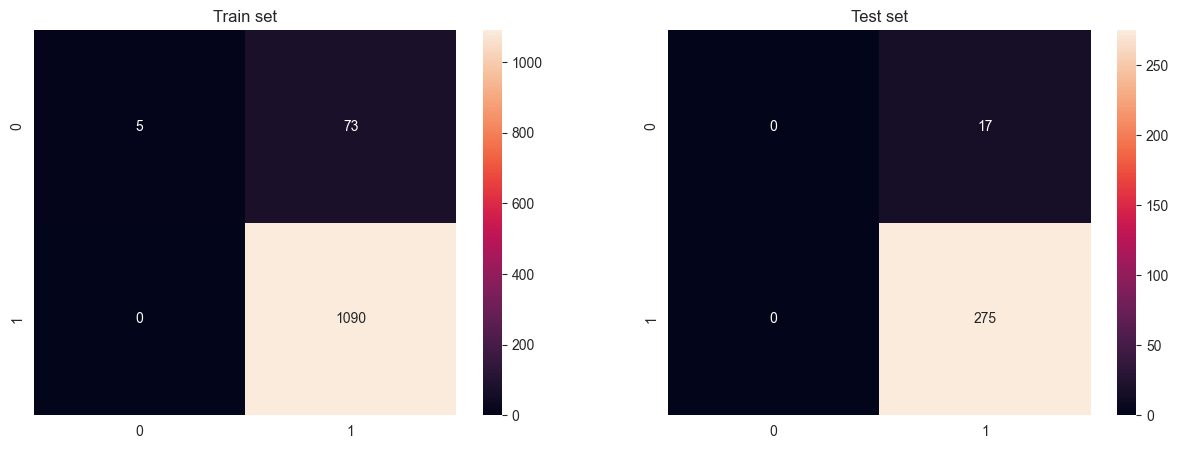

In [54]:
tree_qual_air = predict(overall_qual, central_air)

[Text(0.36363636363636365, 0.9, 'OverallQual <= 3.5\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass = Yes'),
 Text(0.18181818181818182, 0.7, 'OverallQual <= 2.5\ngini = 0.48\nsamples = 20\nvalue = [12, 8]\nclass = No'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = No'),
 Text(0.2727272727272727, 0.5, 'gini = 0.498\nsamples = 15\nvalue = [7, 8]\nclass = Yes'),
 Text(0.5454545454545454, 0.7, 'OverallQual <= 4.5\ngini = 0.108\nsamples = 1148\nvalue = [66, 1082]\nclass = Yes'),
 Text(0.45454545454545453, 0.5, 'gini = 0.317\nsamples = 91\nvalue = [18, 73]\nclass = Yes'),
 Text(0.6363636363636364, 0.5, 'OverallQual <= 6.5\ngini = 0.087\nsamples = 1057\nvalue = [48, 1009]\nclass = Yes'),
 Text(0.45454545454545453, 0.3, 'OverallQual <= 5.5\ngini = 0.126\nsamples = 623\nvalue = [42, 581]\nclass = Yes'),
 Text(0.36363636363636365, 0.1, 'gini = 0.144\nsamples = 319\nvalue = [25, 294]\nclass = Yes'),
 Text(0.5454545454545454, 0.1, 'gini = 0.106\nsample

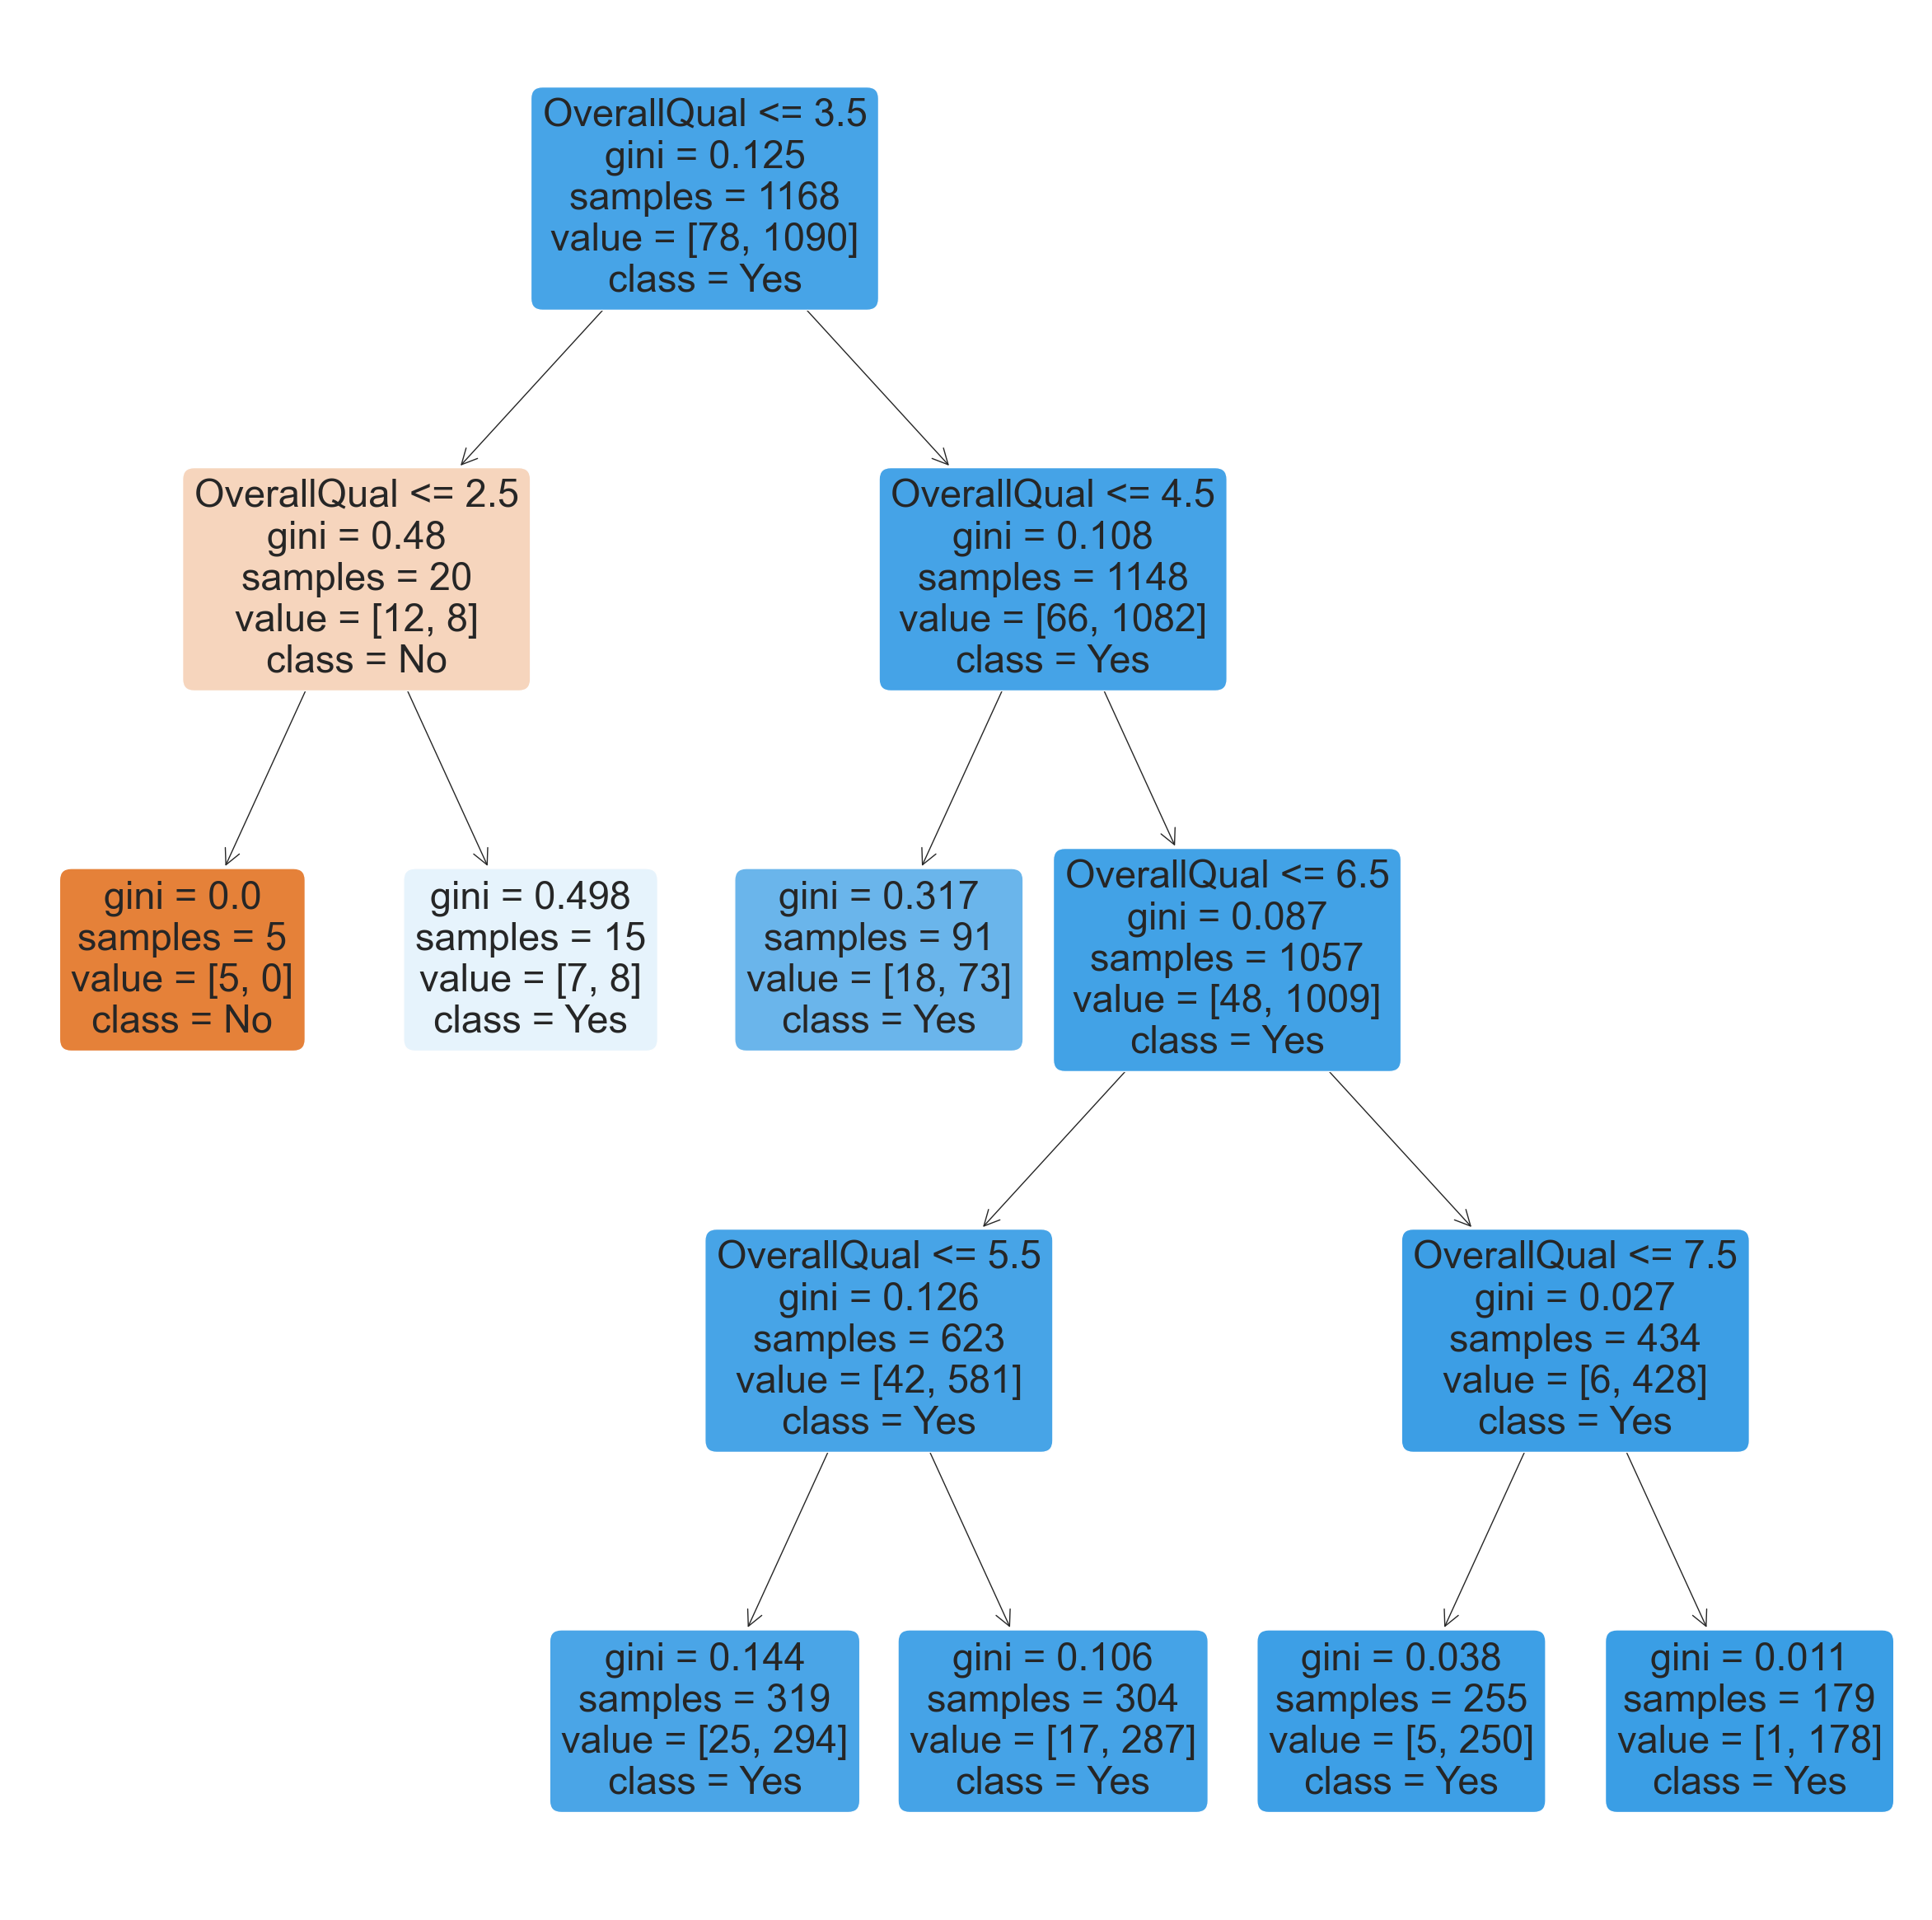

In [60]:
plt.figure(figsize=(30, 30))
plot_tree(tree_qual_air, filled=True, rounded=True, class_names=['No', 'Yes'], feature_names=['OverallQual'])

Predict the value of `CentralAir` using `YearBuilt`.

Classification Accuracy:
Train set:  0.9366438356164384
Test set:  0.9212328767123288
True Positive Rate:
Train set:  0.9788990825688073
Test set:  0.96
False Positive Rate:
Train set:  0.6538461538461539
Test set:  0.7058823529411765


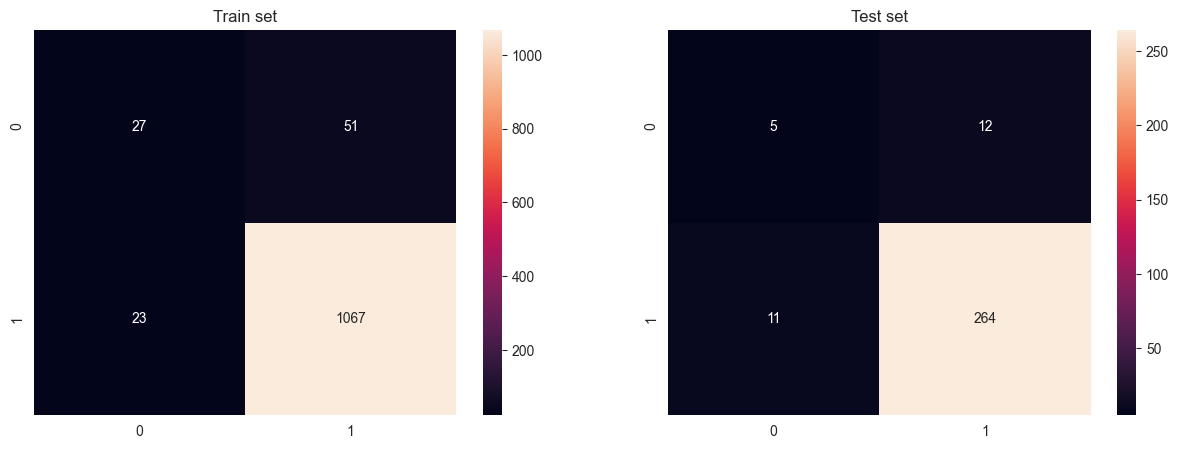

In [55]:
tree_year_air = predict(house_price['YearBuilt'].to_frame(), central_air)

[Text(0.5277777777777778, 0.9, 'YearBuilt <= 1949.5\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass = Yes'),
 Text(0.2777777777777778, 0.7, 'YearBuilt <= 1917.5\ngini = 0.385\nsamples = 257\nvalue = [67, 190]\nclass = Yes'),
 Text(0.1111111111111111, 0.5, 'YearBuilt <= 1877.5\ngini = 0.499\nsamples = 61\nvalue = [29, 32]\nclass = Yes'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.16666666666666666, 0.3, 'YearBuilt <= 1895.5\ngini = 0.496\nsamples = 59\nvalue = [27, 32]\nclass = Yes'),
 Text(0.1111111111111111, 0.1, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = Yes'),
 Text(0.2222222222222222, 0.1, 'gini = 0.499\nsamples = 48\nvalue = [25, 23]\nclass = No'),
 Text(0.4444444444444444, 0.5, 'YearBuilt <= 1948.5\ngini = 0.313\nsamples = 196\nvalue = [38, 158]\nclass = Yes'),
 Text(0.3888888888888889, 0.3, 'YearBuilt <= 1926.5\ngini = 0.293\nsamples = 185\nvalue = [33, 152]\nclass = Yes'),
 Text(0.3333333333333333, 0.1, 'gi

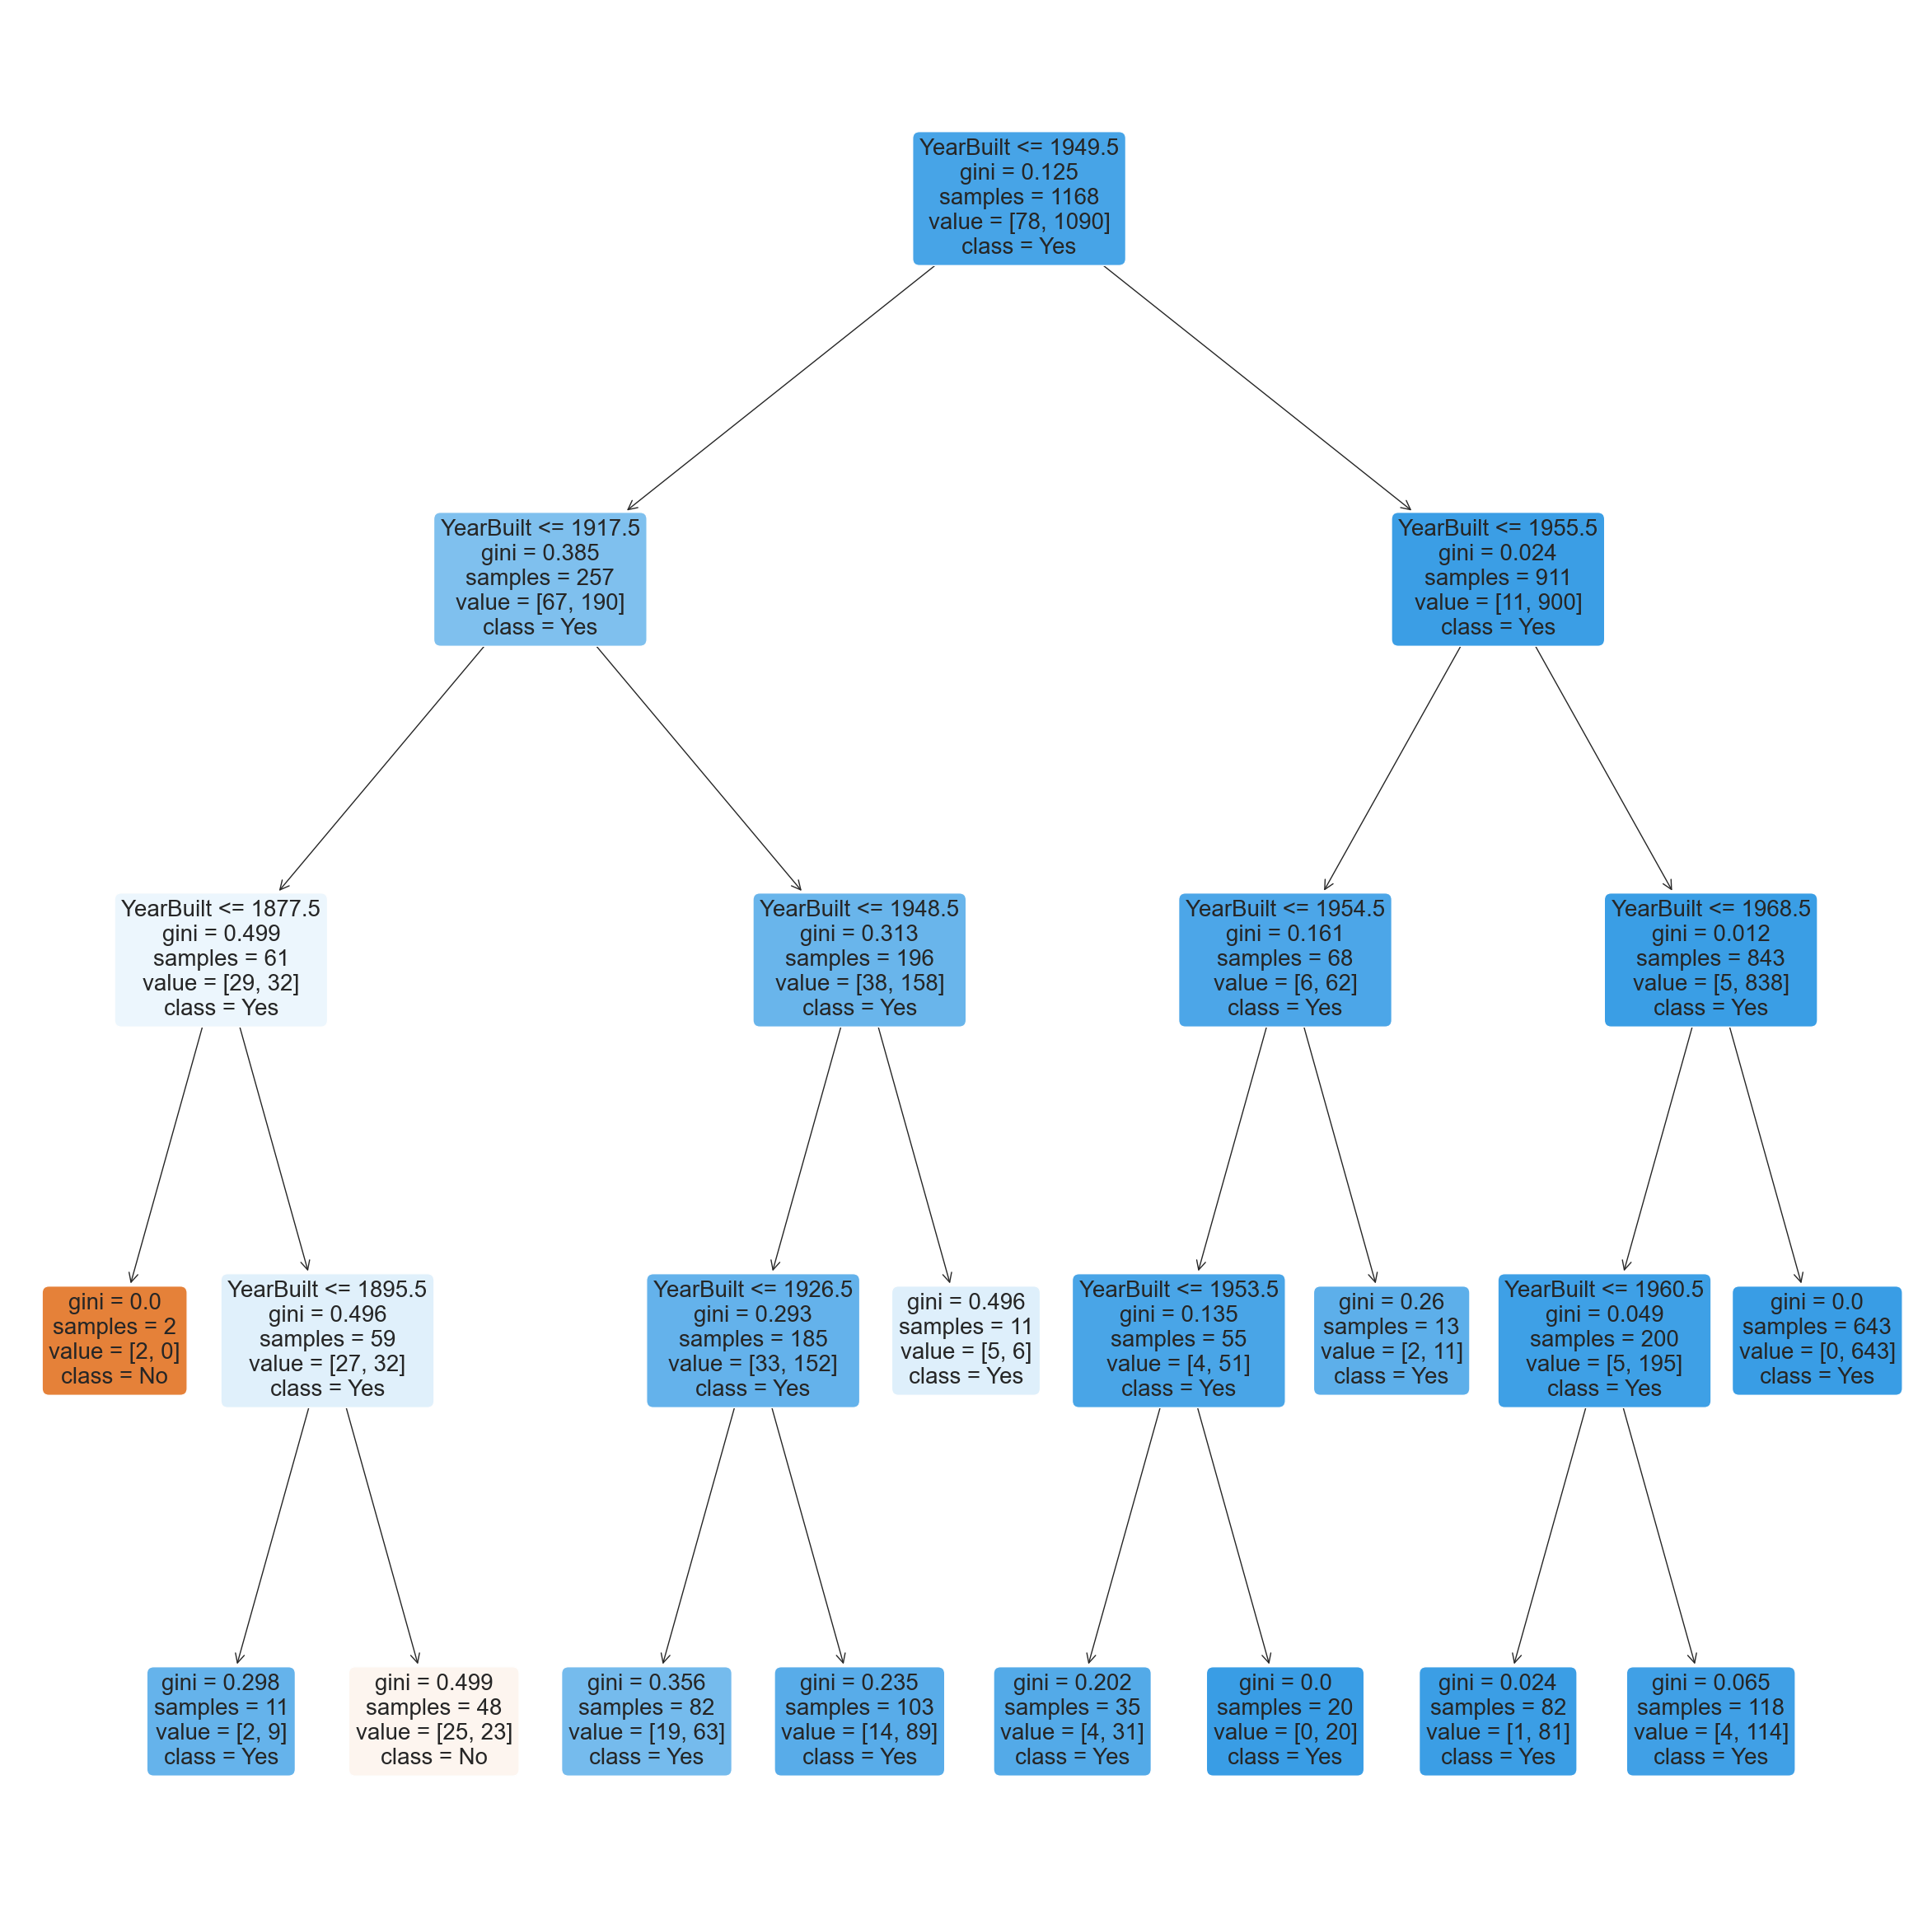

In [59]:
plt.figure(figsize=(30, 30))
plot_tree(tree_year_air, filled=True, rounded=True, class_names=['No', 'Yes'], feature_names=['YearBuilt'])

We found that the model using `YearBuilt` is better because it has a higher classification accuracy and a lower false positive rate on the test set.

# Problem 3 : Understanding the Misclassified Samples

In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.

## (a)

Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

[Text(0.48, 0.9, 'SalePrice <= 107700.0\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass = Y'),
 Text(0.22, 0.7, 'SalePrice <= 61691.5\ngini = 0.475\nsamples = 121\nvalue = [47, 74]\nclass = Y'),
 Text(0.08, 0.5, 'SalePrice <= 46000.0\ngini = 0.245\nsamples = 14\nvalue = [12, 2]\nclass = N'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.12, 0.3, 'SalePrice <= 53500.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = N'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.16, 0.1, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = N'),
 Text(0.36, 0.5, 'SalePrice <= 79250.0\ngini = 0.44\nsamples = 107\nvalue = [35, 72]\nclass = Y'),
 Text(0.28, 0.3, 'SalePrice <= 66750.0\ngini = 0.497\nsamples = 13\nvalue = [7, 6]\nclass = N'),
 Text(0.24, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Y'),
 Text(0.32, 0.1, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = N'),
 Text(0.44, 0.3, 'SalePrice <= 105950.0\ng

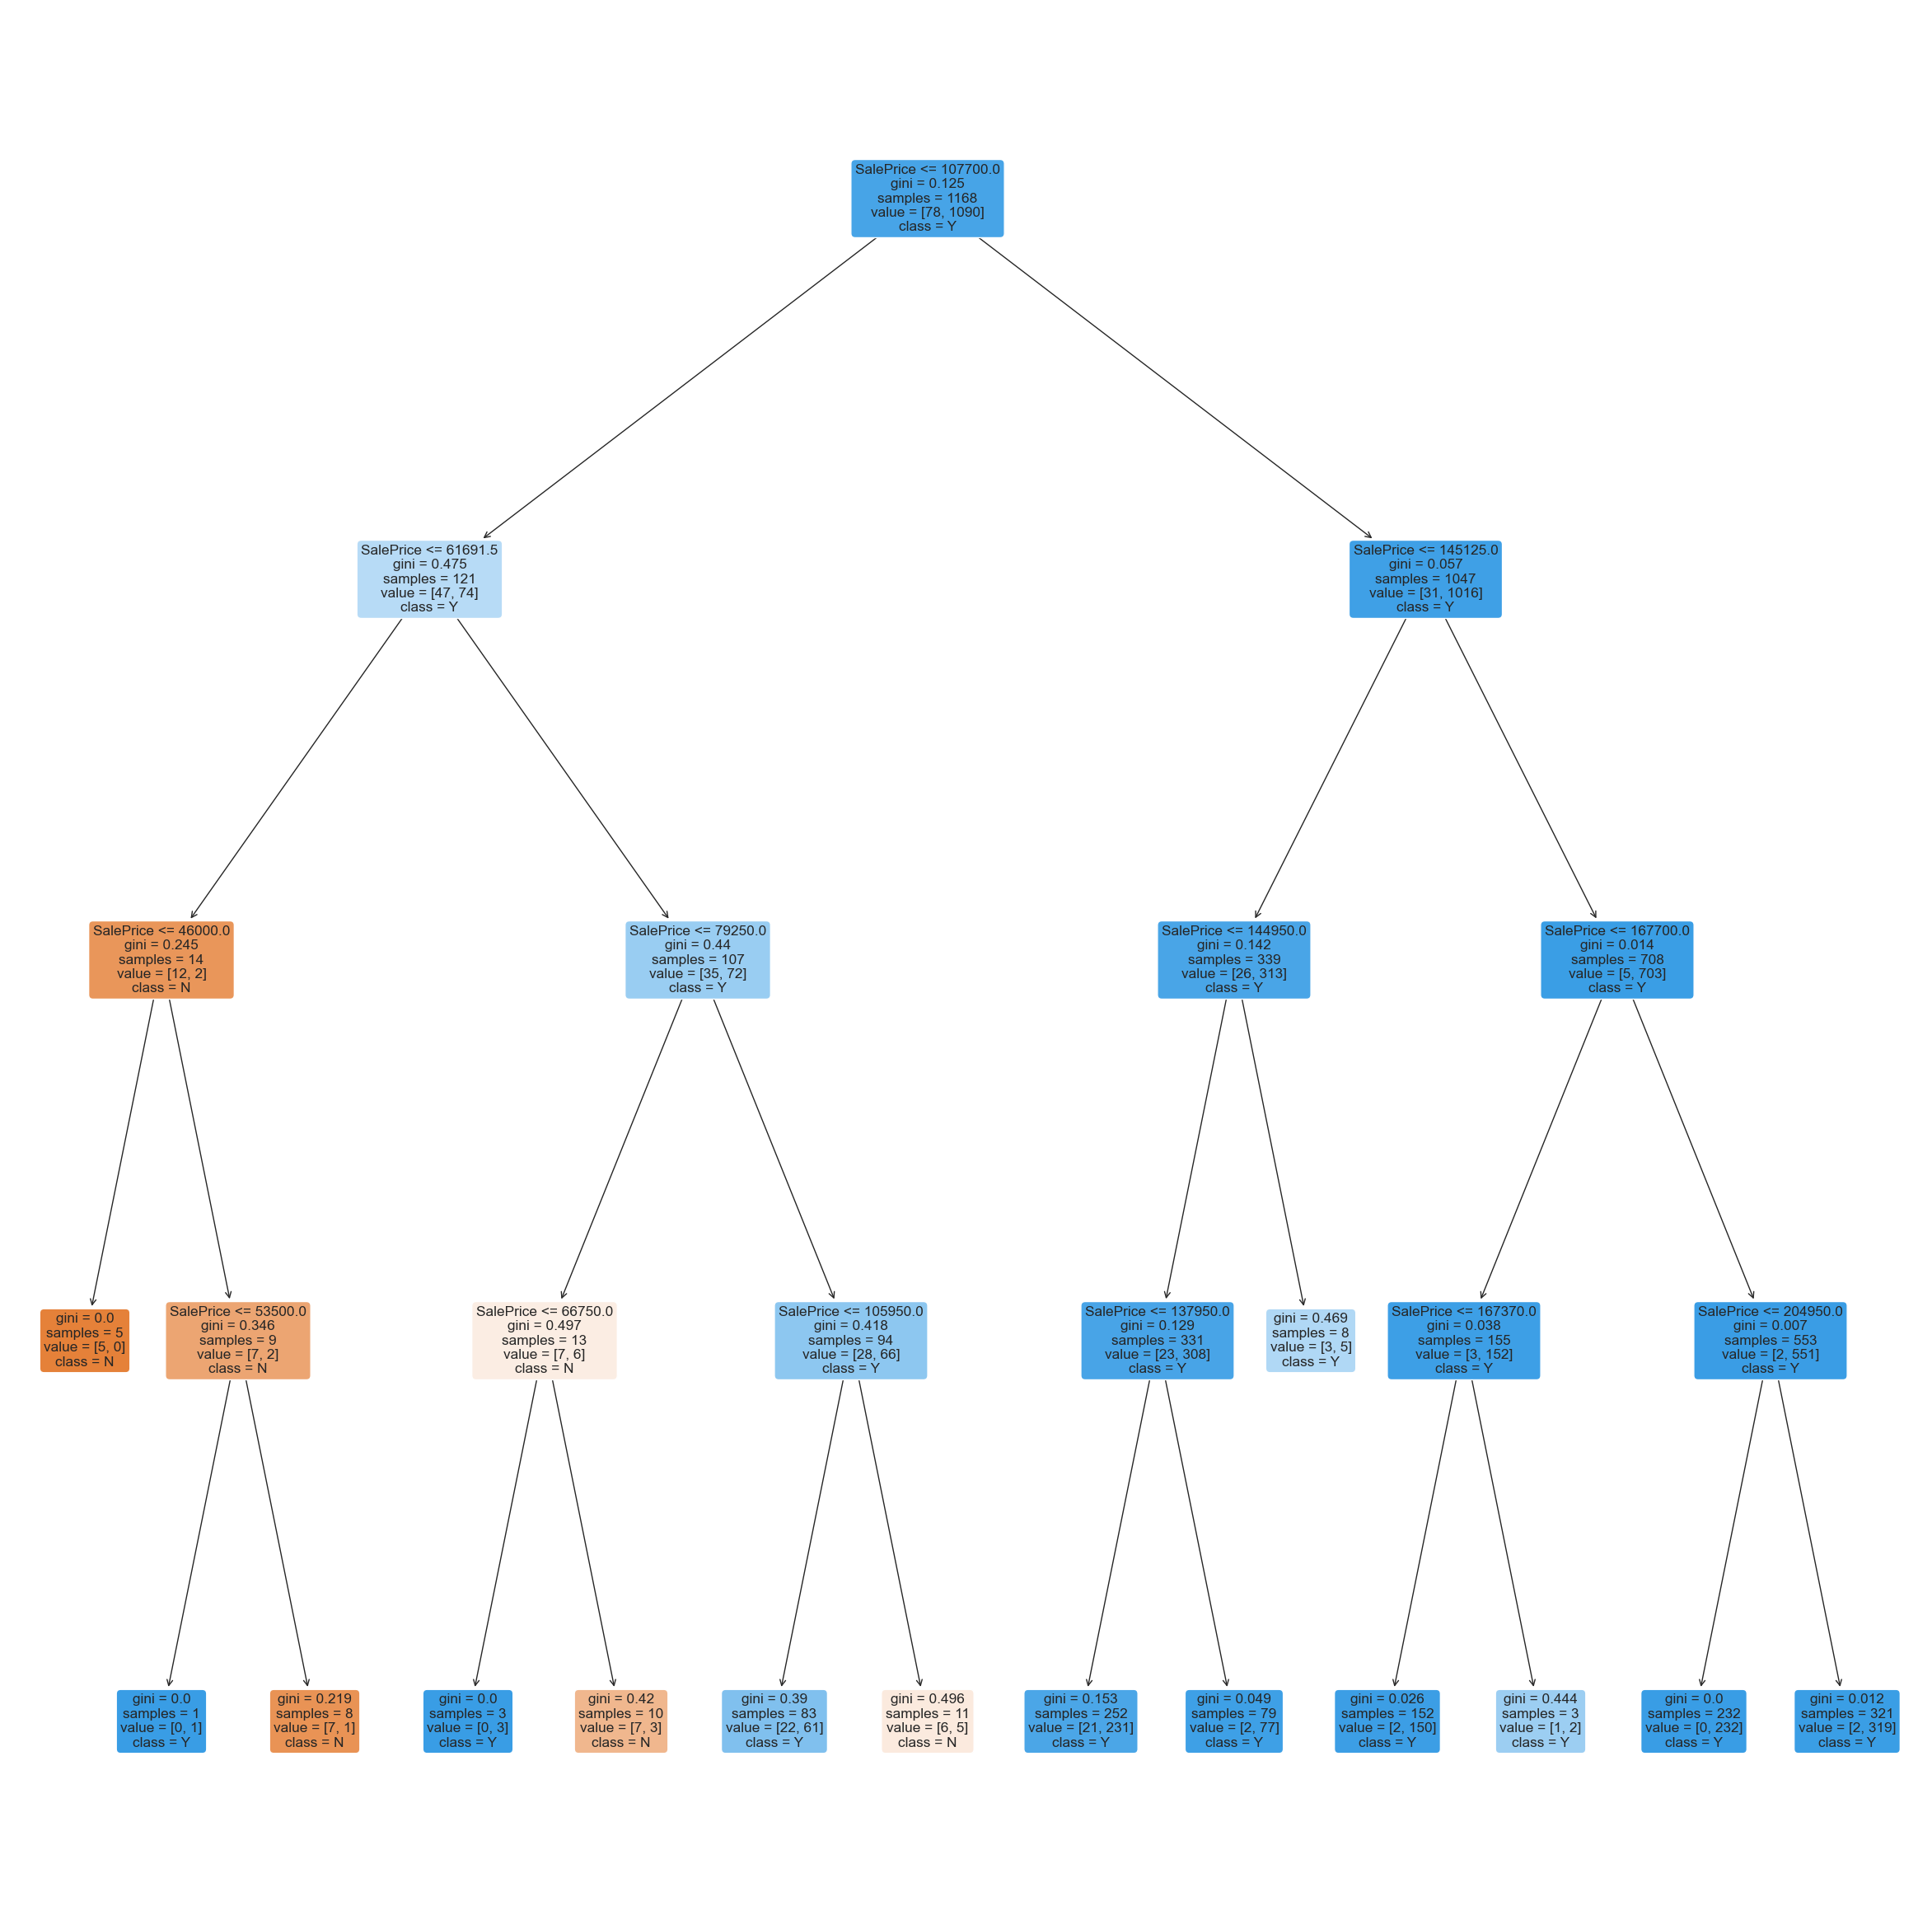

In [66]:
central_air = house_price['CentralAir'].to_frame()
sale_price = house_price['SalePrice'].to_frame()

central_air_train, central_air_test, sale_price_train, sale_price_test = train_test_split(central_air, sale_price, test_size=0.2)

price_air_tree = DecisionTreeClassifier(max_depth=4)
price_air_tree.fit(sale_price_train, central_air_train)

plt.figure(figsize=(30, 30))
plot_tree(price_air_tree, filled=True, rounded=True, feature_names=['SalePrice'], class_names=['N', 'Y'])

By observation, `SalePrice` in $\left(66750, 105950\right]$ will contribute the greatest False Positive.

Then print these samples in train set.

In [74]:
price_air_train = pd.concat([sale_price_train, central_air_train], axis=1)
price_air_train_extracted = price_air_train[(price_air_train['SalePrice'] > 79250) & (price_air_train['SalePrice'] <= 105950)]
price_air_train_extracted

,SalePrice,CentralAir
341,82000,Y
91,98600,Y
1185,104900,Y
479,89471,Y
617,105500,Y
...,...,...
1035,84000,N
179,100000,Y
1038,97000,Y
223,97000,Y


## (b)

Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).

In [75]:
price_air_train_extracted[price_air_train_extracted['CentralAir'] == 'N']

,SalePrice,CentralAir
821,93000,N
736,93500,N
1376,91000,N
1218,80500,N
88,85000,N
342,87500,N
676,87000,N
1137,94000,N
456,98000,N
1000,82000,N
